# Convert data to EPOCHES

In [36]:
# Notebook 2
from pickleshare import PickleShareDB
db = PickleShareDB('./tmp')
raw = db['raw']
originalRaw = db['originalRaw']
picks = db['picks']
events = db['events']
events_ids = db['events_ids']

### Test if we have our Raw Data

In [37]:
print(len(raw))
print(type(raw))
print(len(originalRaw))
print(type(originalRaw))
print(type(picks))
print(events_ids)

120000
<class 'mne.io.edf.edf.RawEDF'>
120000
<class 'mne.io.edf.edf.RawEDF'>
<class 'numpy.ndarray'>
{'do/feet': 1, 'do/hands': 2, 'imagine/feet': 3, 'imagine/hands': 4, 'rest': 5}


#### الحمد لله

## What are EPOCHES ?
In the context of EEG (Electroencephalogram) data analysis, an epoch refers to a segment of the continuous EEG recording that is time-locked to a specific event or stimulus. Epoching is a technique where the continuous EEG signal is divided into smaller, non-overlapping time windows, each centered around a particular event or marker.

Here's a brief explanation:

- **Epoching:**
  - **Purpose:** To extract and analyze EEG activity related to specific experimental events or conditions.
  - **Process:** The continuous EEG signal is divided into epochs, typically centered around events of interest, such as stimulus onset or response.
  - **Duration:** Each epoch is a fixed time window, capturing EEG activity before and after the event.
  - **Analysis:** Epochs can be averaged across trials to create event-related potentials (ERPs), revealing patterns of brain activity related to specific stimuli or tasks.

For example, in a visual experiment where participants respond to the presentation of a stimulus, epochs might be centered around the onset of the visual stimulus. This allows researchers to analyze the EEG activity associated with the processing of that stimulus.

Epoching is a fundamental step in EEG preprocessing for event-related analyses, providing a way to focus on specific time periods of interest and improving the signal-to-noise ratio for subsequent analysis.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

import mne
from mne import Epochs
mne.set_log_level('WARNING')

## What we need ?
fo epoching data we need events markers, Usually these are stored in the `raw` object (in MNE) in a stimulus channels.

In [146]:
tmin = -1  # Time before event in seconds
tmax = 4  # Time after event in seconds
epochs = mne.Epochs(raw, events, events_ids, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)
epochs

Number of events,174
Events,do/feet: 23do/hands: 22imagine/feet: 21imagine/hands: 24rest: 84
Time range,-1.000 – 4.000 s
Baseline,off


In [147]:
print(f"Tmin ='{tmin}' | Tmax='{tmax}'")
times = np.linspace(tmin, tmax, 6)
print(f"Times = {times}")

Tmin ='-1' | Tmax='4'
Times = [-1.  0.  1.  2.  3.  4.]


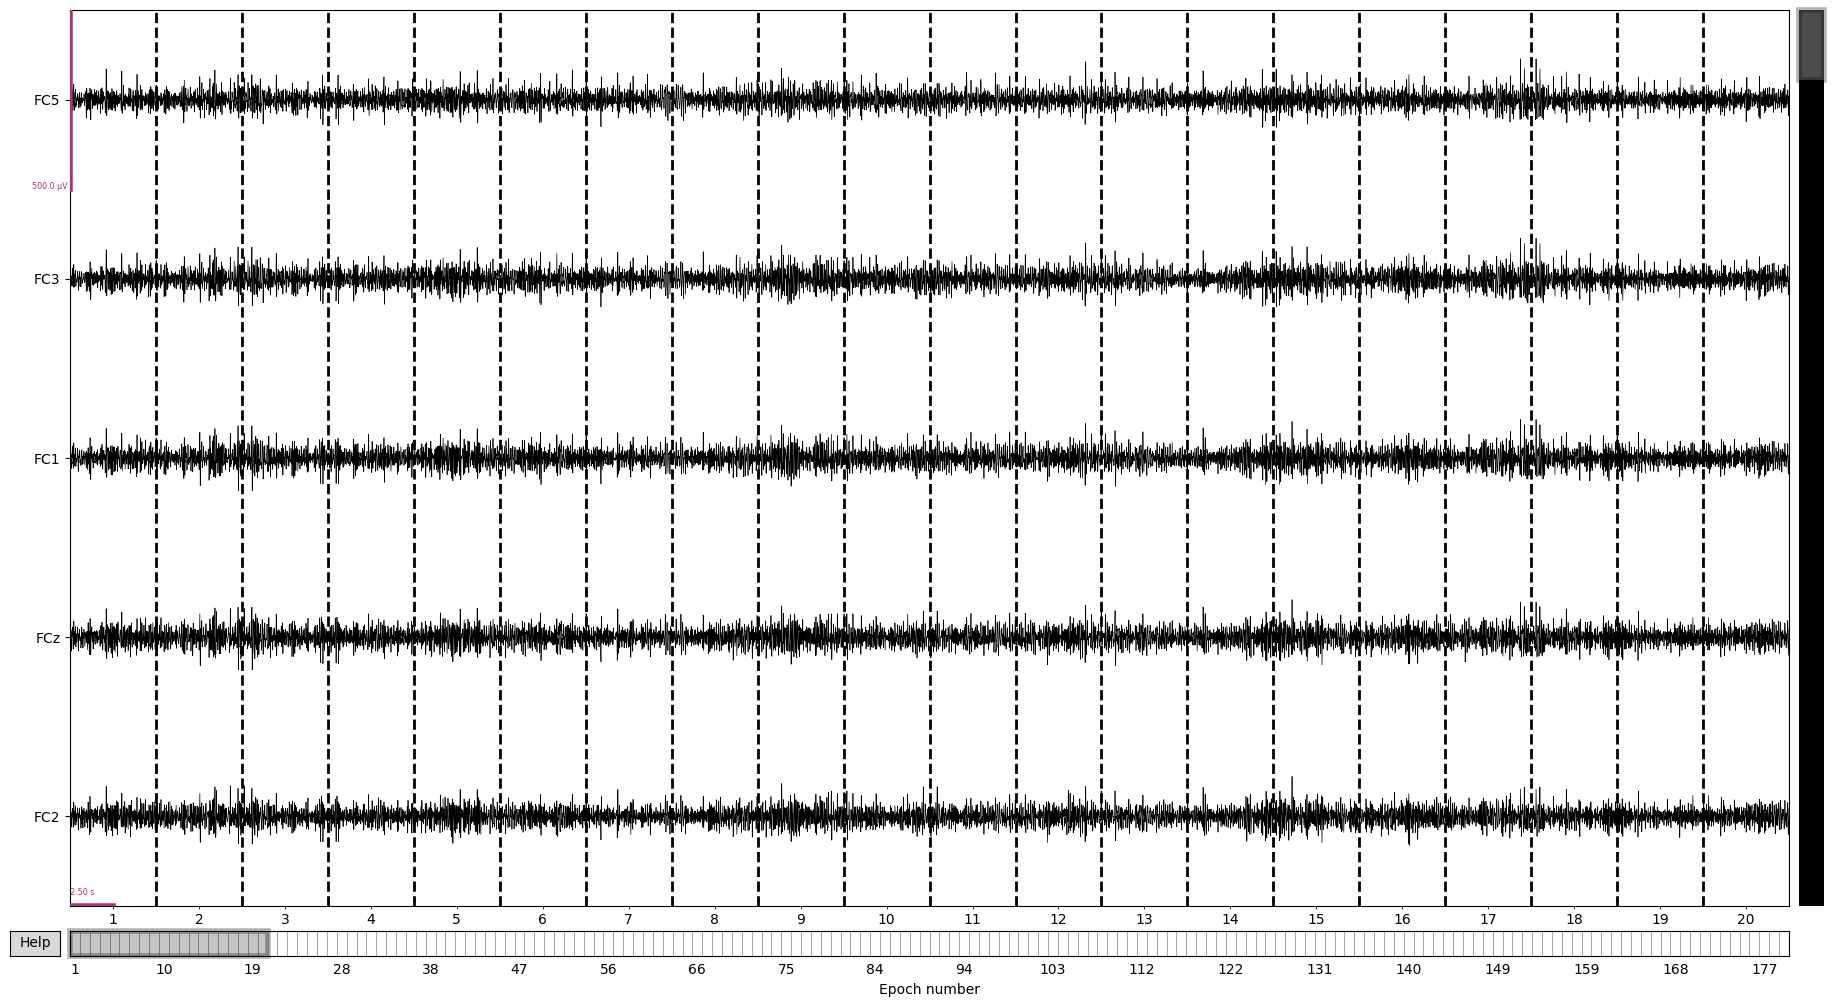

''

In [148]:
epochs.plot(n_channels=5, scalings=dict(eeg=250e-6))
;

`events` is simply an array (time in samples, zero, event trigered)

In [149]:
do_epoches = epochs['do']
imagine_epoches = epochs['imagine']


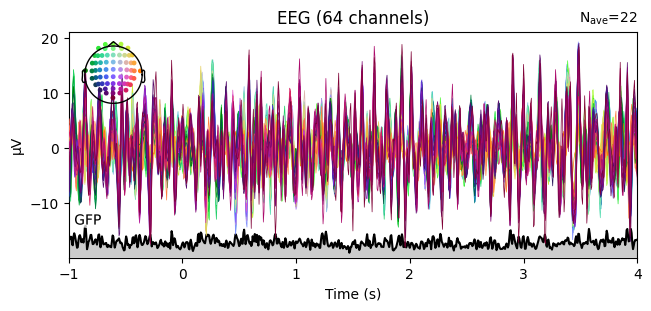

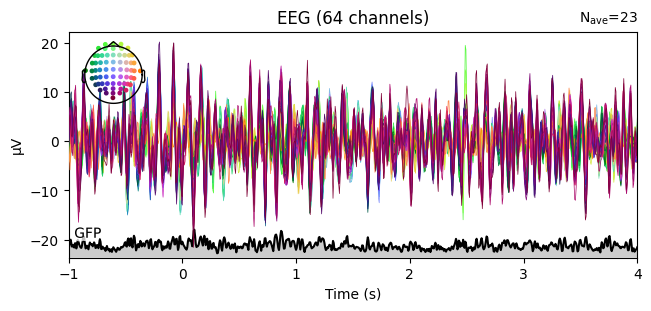

''

In [150]:
do_hands_epoches = do_epoches['hands'].average()
do_hands_epoches.plot(spatial_colors=True, gfp=True, time_unit='s')

do_feet_epoches = do_epoches['feet'].average()
do_feet_epoches.plot(spatial_colors=True, gfp=True, time_unit='s')

;

In [151]:
print(do_epoches)
print(imagine_epoches)

<Epochs |  45 events (all good), -1 – 4 s, baseline off, ~17.7 MB, data loaded,
 'do/feet': 23
 'do/hands': 22>
<Epochs |  45 events (all good), -1 – 4 s, baseline off, ~17.7 MB, data loaded,
 'imagine/feet': 21
 'imagine/hands': 24>


## Execution vs Imagine hands movements [topomap]

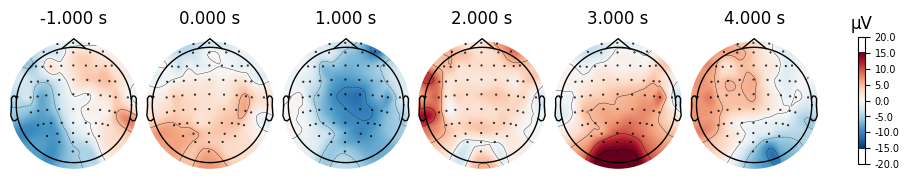

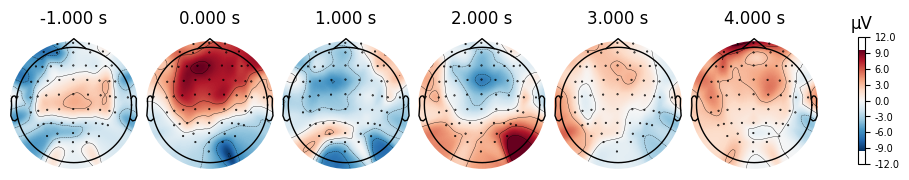

''

In [152]:
do_epoches['hands'].average().plot_topomap(ch_type='eeg', times=times, colorbar=True)
imagine_epoches['hands'].average().plot_topomap(ch_type='eeg', times=times, colorbar=True)
;

## Execution vs Imagine hands movements [joint]

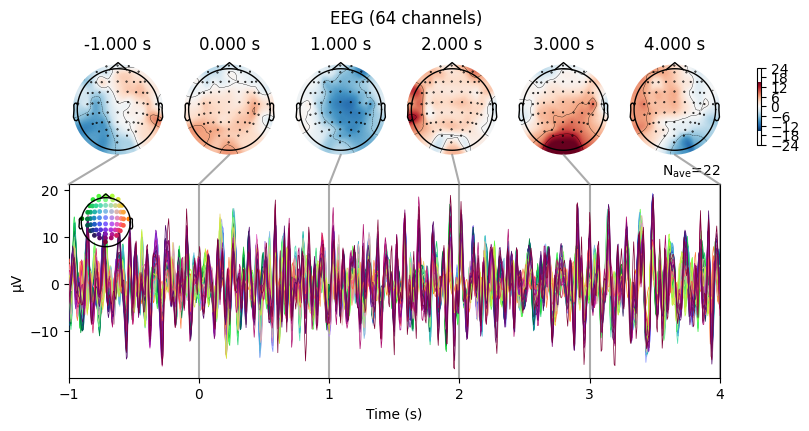

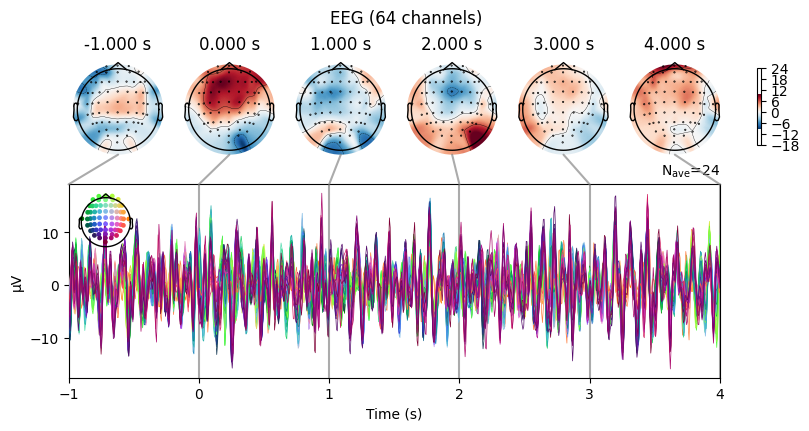

''

In [153]:
do_epoches['hands'].average().plot_joint(times=times)
imagine_epoches['hands'].average().plot_joint(times=times)
;

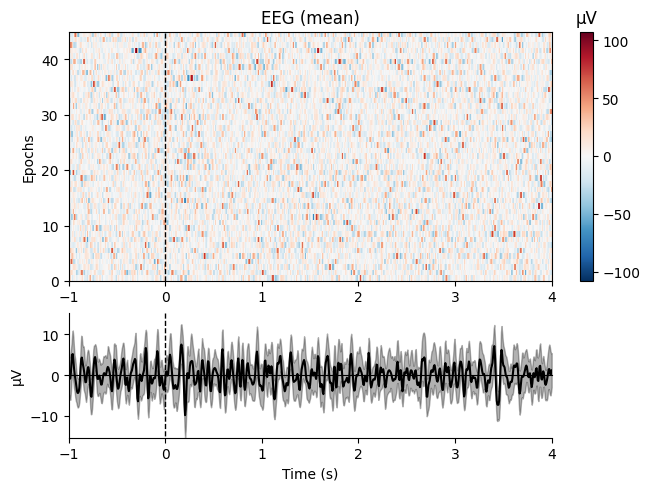

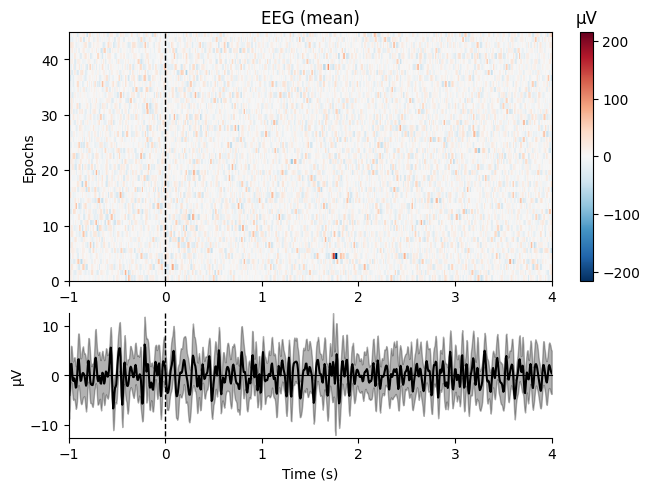

''

In [154]:
channelIdx = [1]
do_epoches.plot_image(picks='eeg', combine='mean')
;
imagine_epoches.plot_image(picks='eeg', combine='mean')
;

## Shapes

In [155]:
print("----------------- (the epoch,  channels,  time points)")

print("Epoches shape          : ", epochs.get_data(copy=False).shape)
print("Epoches[do] shape      : ", do_epoches.get_data(copy=False).shape)
print("Epoches[imagine] shape : ", imagine_epoches.get_data(copy=False).shape)

#3 D array: the epoch, channels, time points


----------------- (the epoch,  channels,  time points)
Epoches shape          :  (174, 64, 801)
Epoches[do] shape      :  (45, 64, 801)
Epoches[imagine] shape :  (45, 64, 801)


## Difference waveform:

The term "difference waveform" refers to the waveform that results from the mathematical subtraction of one set of data from another. In the context of EEG or MEG data, it often represents the difference in neural activity between two experimental conditions.

we are combining the 'do' condition (`do_evoked`) with the negation of the 'imagine' condition (`-imagine_evoked`). This subtraction effectively creates a new waveform that represents the difference in neural activity between these two conditions.

Here's a simplified explanation:

- If the waveform at a specific time point is positive in the 'do' condition and negative in the 'imagine' condition, the resulting difference waveform will have a peak at that time point, indicating a difference in neural activity.

- If the waveform at a specific time point is negative in the 'do' condition and positive in the 'imagine' condition, the resulting difference waveform will have a trough at that time point.

By examining the difference waveform, researchers can gain insights into how the brain's electrical activity differs between two experimental conditions. This approach is commonly used in event-related potential (ERP) studies to isolate and analyze specific components of the neural response associated with different cognitive or sensory processes.

In [156]:
do_evoked = do_epoches.average()
imagine_evoked = imagine_epoches.average()

In [157]:
diff = mne.combine_evoked([do_evoked, -imagine_evoked], weights="equal")

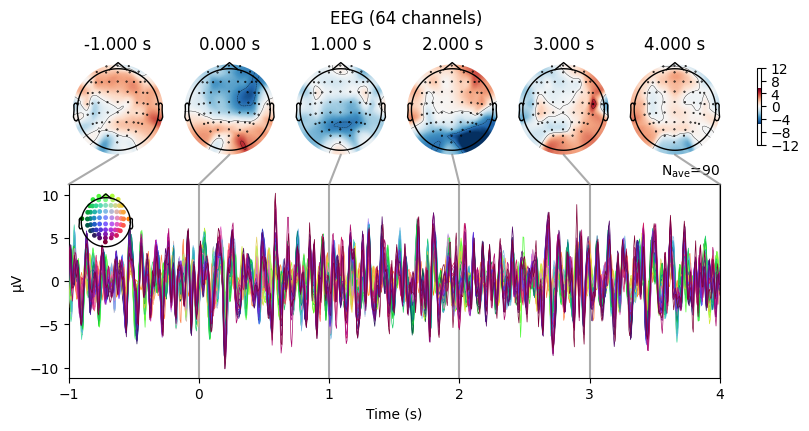

''

In [158]:
diff.plot_joint(times=times)
;

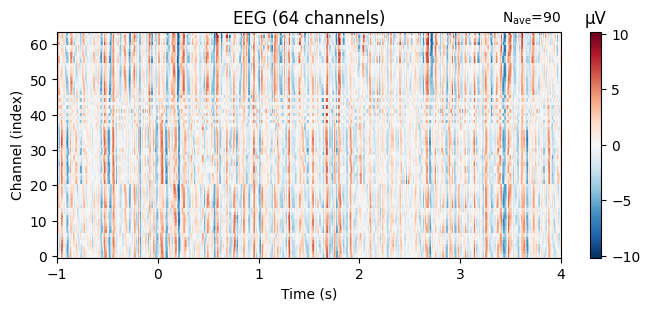

''

In [159]:
diff.plot_image()
;

## Share Data with other notebooks

In [161]:
db['epochs'] = epochs
db['events'] = events
db['events_ids'] = events_ids